<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Basis Statistiek</h1>

<h2>Dobbelstenen</h2>

<div>
<img src='pics/dobbelsteen.jpg'/>    
</div>    

In [15]:
from dobbelsteen import Dobbelsteen
from matplotlib_venn import venn2
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import pylab as plt
import random
import seaborn as sns
import statistics as st

<h2>Dobbelsteen</h2>

In [16]:
d = Dobbelsteen()
print(d.show())

┌─────────┐
│  ●      │
│         │
│      ●  │
└─────────┘


<h3>Uitkomstruimte</h3>

In [17]:
print(d.values)  

{1, 2, 3, 4, 5, 6}


<h3>Kansmassa-functie</h3>

In [18]:
p = "1/6"
prob = {element:p for element in d.getList()}

for i in d.getList():
    print( f"p({i}) = {prob.get(i)}" )

p(1) = 1/6
p(2) = 1/6
p(3) = 1/6
p(4) = 1/6
p(5) = 1/6
p(6) = 1/6


<h2>Twee dobbelstenen</h2>

In [19]:
d0 = Dobbelsteen()
d1 = Dobbelsteen()
print( f"{d0.show()}\n{d1.show()}" )

┌─────────┐
│  ●   ●  │
│  ●   ●  │
│  ●   ●  │
└─────────┘
┌─────────┐
│  ●      │
│    ●    │
│      ●  │
└─────────┘


<h3>Uitkomstruimte</h3>

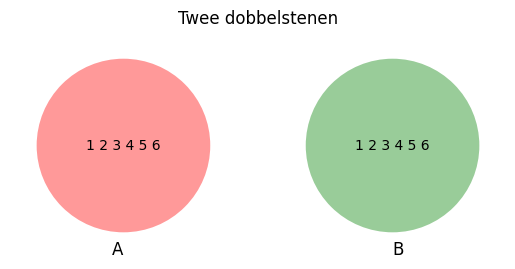

In [20]:
v = venn2(subsets=(1,1,0,1,0))
uitkomsten = "1 2 3 4 5 6"
v.get_label_by_id('100').set_text(uitkomsten)
v.get_label_by_id('010').set_text(uitkomsten)
plt.title("Twee dobbelstenen")
plt.show()

<h3>Exercise 1</h3>

<h4>Gegeven</h4>
<p>Dobbelstenen d0 en d1</p>

<h4>Gevraagd</h4>
<p>
    Maak een <u>set</u> van de <u>gecombineerde uitkomstruimte</u> <i>dice</i> die ontstaat door dobbelstenen d0 en d1 tegelijkertijd te werpen
</p>

<h4>Oplossing</h4>

In [21]:
# Oplossing
#dobbelsteen 1 is d0
#dobbelsteen 2 is d1
#append is toevoegen

#totaal =[]
#for d0 in range(1,7):
#    for d1 in range (1,7):
#         totaal.append((d0,d1))
#gecombineerde_uitkomstruimte = set(totaal)

#print(gecombineerde_uitkomstruimte)

dice = set()
for i in d0.getList():
    for j in d1.getList():
        dice.add((i,j))

print(dice)



{(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3)}


<h3>Exercise 2</h3>

<h4>Gegeven</h4>
<p>Dobbelstenen <i>d0</i> en <i>d1</i> en hun gecombineerde uitkomstruimte <i>dice</i></p>

<h3>Gevraagd</h3>
<p>
    Geef de <u>kansmassa-functie</u> van de som van het aantal ogen van <i>d0</i> en <i>d1</i><br>
    <strong>TIP</strong>: Maak eerst een dictionary met daarin per alle uitkomsten
</p>

<h4>Oplossing</h4>

In [22]:
# Oplossing
#Dictionary

d0_values = (1, 2, 3, 4, 5, 6)
d1_values = (1, 2, 3, 4, 5, 6)

probability = 1/36
dec = 2
getal = 0
values = []
finDict = {}

for x in d0_values:
    for y in d1_values:
        getal = x + y
        values.append(getal)
        diceDict = {v:values.count(v)for v in values}

#print(diceDict)
        
for key in diceDict:
    diceDict[key] *= probability
    finDict[key] = round (diceDict[key], dec)


print("De kans massa-functie voor twee stenen:\n", finDict, "\n")

#voorbeeld Jeroen.
#range(2, 13)
#diceDict[2] = [dice for dice in list1 if sum(dice) == 2]


De kans massa-functie voor twee stenen:
 {2: 0.03, 3: 0.06, 4: 0.08, 5: 0.11, 6: 0.14, 7: 0.17, 8: 0.14, 9: 0.11, 10: 0.08, 11: 0.06, 12: 0.03} 



<h3>Metrics</h3>

**Gebruik een numpy array voor het bepalen van centrum-maten**

<h3>Exercise 3a</h3>

<h4>Gegeven</h4>
<p>De class Dobbelsteen in de module dobbelsteen.py</p>

In [23]:
d2 = Dobbelsteen()
d3 = Dobbelsteen()
histD2 = np.empty(1000)
histD3 = np.empty(1000)

<h4>Gevraagd</h4>
<p>
    Voeg het volgende toe aan class Dobbelsteen:
    <ol>
        <li>list variabele <u>history</u> waaraan de uitkomst van iedere worp wordt toegevoegd</li>
        <li>methode <u>getHistory(self)</u> die de waarde van variabele <u>history</u> geeft als <u>numpy-array</u></li>
    <li>Schrijf in de cell hieronder een loop die 1000 keer zowel <i>d2</i> als <i>d3</i> werpt en sla de uitkomsten op in rescpectievelijk <i>histD2</i> en <i>histD3</i>. Maak daarbij gebruik van de methode <u>getHistory()</u> uit de vorige stap</li>
    </ol>
 </p>  

In [24]:
import numpy as np
from dobbelsteen import Dobbelsteen


for _ in range(999):

    d2.roll()
    d3.roll()
histD2[:] = d2.getHistory()
histD3[:] = d3.getHistory()

print(histD2.shape)
print(histD3.shape)



(1000,)
(1000,)


<h3>Exercise 3b</h3>

<h4>Gevraagd</h4>
<p>
    <ol>
        <li>Maak een <u>numpy array histD2D3</u> waarin de uitkomsten van <i>d2</i> en <i>d3</i> paarsgewijs bij elkaar zijn opgeteld.<br> <strong>Hint</strong>: <i>histD2D3 = np.add(histD2, histD3)</i></li> 
        <li>Print van de modus van zowel histD2 als histD3</li>
        <li>Vul onderstaande code aan een <u>histogram van histD2D3</u>.
    </ol>
 </p>  

1.0

In [40]:

new_result= np.add(histD2,histD3)
print("adding two arrays:",new_result)



adding two arrays: [ 6.  9.  2.  4. 10.  9. 10.  5.  5.  8.  3.  8.  6. 10.  6.  9.  5. 10.
 10.  7.  6.  3.  8.  6.  5.  7.  6.  5.  6. 11.  7.  6.  5.  9.  8.  6.
  7.  4.  3.  9.  6.  6. 11. 12.  6.  8.  2.  6. 12.  4.  2.  5. 11.  5.
  3.  4.  6.  6.  5.  6.  5.  7. 10.  5.  5.  6.  5.  5.  8.  6. 11.  8.
  7.  4.  8. 11.  5.  5.  9.  8.  5.  4. 11.  5.  6.  5.  8.  9.  8.  5.
  6.  9.  8.  7.  8.  6.  8.  4.  9.  9.  6.  5.  4.  8.  5.  6.  3.  9.
  8.  4.  6. 12.  6.  8.  5.  5.  7.  6.  8. 11.  4.  3.  5.  5.  6.  5.
  7.  8.  8.  5.  7.  2.  4.  6.  7.  7.  8.  7.  6.  4.  7.  8. 10.  5.
  7.  7.  5.  6. 10.  9.  6. 12.  9.  4.  7.  9.  7.  9.  7. 10.  6.  5.
  5.  6.  4.  7.  8. 10.  8.  7.  8.  5.  6.  8.  7.  4.  3.  8. 10.  9.
  9.  8.  5.  4.  4.  8.  7.  7.  5. 11.  6.  4.  4.  7.  6.  9.  8.  9.
  8.  9.  7.  3.  9.  6. 10.  4.  7.  4.  5.  9.  8.  6.  7.  5.  8.  7.
 11. 11. 10.  3.  7.  7. 11.  3. 10. 11.  5.  5.  7.  9.  5.  6.  5.  7.
 10. 10. 11.  7.  6.  6.  6.  6.

In [71]:
import statistics

dataset1 = histD2
modus = statistics.mode(dataset1)
print("De modus D2 is: " + str(modus))

dataset2 = (histD3)
modus = statistics.mode(dataset2)
print("De modus D3 is: " + str(modus))

#print(dataset1.max())
#plt.hist(dataset1,range(0,10))

De modus D2 is: 1.0
De modus D3 is: 3.0


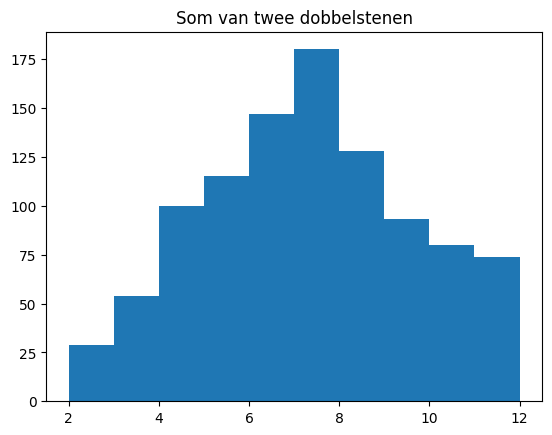

In [72]:
# Oplossing
x =(histD2[:] + histD3[:])
plt.hist(x) 
plt.title("Som van twee dobbelstenen") 
plt.show()